In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time=10.0
steps=100.0
h=time/steps

In [3]:
#generating inputs
Omega=[]
for i in range(int(steps)):
  x=5.0 #+np.random.randn()
  omg=np.array([[0, x], [-x, 0]])
  Omega.append(omg)

In [4]:
def vee(M):
  return M[1,0]

def hat(v):
  out = np.zeros((2,2))
  out[0,1] = -v
  out[1,0] = v
  return out

In [5]:
#function for calculating matrix exponential; check whether it returns a rotation matrix and a correct example 
def expo(A):
  omega = vee(A)
  norm_omega = np.linalg.norm(omega)
  A = hat(omega/norm_omega)
  theta = norm_omega*h
  return np.array([[1,0],[0,1]])+np.sin(theta)*A+(1-np.cos(theta))*np.matmul(A,A)

#omega = (np.pi/180.0)*30.0
#print(expo(hat(omega)))

In [6]:
R=[]
R_old=np.array([[np.cos(0.86),-np.sin(0.86)],[np.sin(0.86),np.cos(0.86)]])
R.append(R_old)
for i in range(int(steps)):
  R_curr=np.matmul(R_old,expo(Omega[i]))
  R.append(R_curr) 
  R_old=R_curr

In [7]:
eta_1=np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])
eta_2=np.array([[-2/np.sqrt(13)],[3/np.sqrt(13)]])

In [8]:
y_1=[]
y_2=[]
for i in range(int(steps)+1):
  y_1.append(np.matmul(np.transpose(R[i]),eta_1))
  y_2.append(np.matmul(np.transpose(R[i]),eta_2))

In [9]:
k=5
Rhat=[]
Rhat_old=np.array([[np.cos(0.2),-np.sin(0.2)],[np.sin(0.2),np.cos(0.2)]])
Rhat.append(Rhat_old)
for i in range(int(steps)):
  Omega_e=(-np.matmul(eta_1,np.matmul(np.transpose(y_1[i+1]),np.transpose(Rhat_old)))+np.matmul(Rhat_old,np.matmul(y_1[i+1],np.transpose(eta_1))))-np.matmul(eta_2,np.matmul(np.transpose(y_1[i+1]),np.transpose(Rhat_old)))+np.matmul(Rhat_old,np.matmul(y_1[i+1],np.transpose(eta_2)))
  Delta=k*(np.matmul(np.transpose(Rhat_old),np.matmul(Omega_e,Rhat_old)))
  mat=Omega[i]-Delta
  Rhat_new=np.matmul(Rhat_old,expo(mat))
  Rhat.append(Rhat_new)
  Rhat_old=Rhat_new

In [10]:
#error calculation
errors=[]
err_1=[]
for i in range(int(steps)):
  err=np.matmul(np.transpose(Rhat[i]),R[i])
  err_1.append(err)
  x=np.linalg.norm(err)
  errors.append(x)

In [11]:
trace=[]
for i in range(int(steps)):
  trace.append(np.trace(err_1[i]))

Text(0, 0.5, 'Trace')

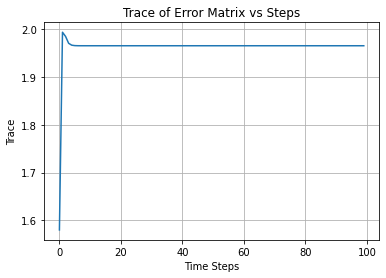

In [12]:
x=np.arange(int(steps))
plt.plot(x,trace)
plt.grid()
plt.title("Trace of Error Matrix vs Steps")
plt.xlabel("Time Steps")
plt.ylabel("Trace")